In [22]:
import requests
import zipfile
from pathlib import Path

import torch
from torch import nn

import torchvision
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.1
0.15.2


## Dataset

In [23]:
data_path = Path("data/")
image_path = data_path / "images"


check = False

if check:
    if image_path.is_dir():
        print("Directory exists.")
    else:
        print("{image_path} path does not exist. Creating...")
        image_path.mkdir(parents=True, exist_ok=True)

    with open(image_path / "images.zip", "wb") as f:
        print("Downloading images...")
        requests = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Images downloaded, writing to file...")
        f.write(requests.content)

In [24]:
## unzip the images
if check:
    print("Unzipping images...")
    with zipfile.ZipFile(image_path / "images.zip", "r") as zip_ref:
        zip_ref.extractall(image_path)
        print("Images unzipped.")

## Data Preparation and Data Exploration

In [25]:
import os

def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 2 directories and 1 images in 'data/images'.
There are 3 directories and 0 images in 'data/images/test'.
There are 0 directories and 19 images in 'data/images/test/steak'.
There are 0 directories and 31 images in 'data/images/test/sushi'.
There are 0 directories and 25 images in 'data/images/test/pizza'.
There are 3 directories and 0 images in 'data/images/train'.
There are 0 directories and 75 images in 'data/images/train/steak'.
There are 0 directories and 72 images in 'data/images/train/sushi'.
There are 0 directories and 78 images in 'data/images/train/pizza'.


In [26]:
train_dir = image_path / "train"
test_dir = image_path / "test"

In [28]:
import random
from PIL import Image

random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)
print(random_image_path)

image_class = random_image_path.parent.name
print(image_class)

data/images/test/pizza/2236338.jpg
pizza


Image path: data/images/test/pizza/2236338.jpg
Image size: (512, 512)
Image mode: RGB
Image height: 512
Image width: 512
Image format: JPEG


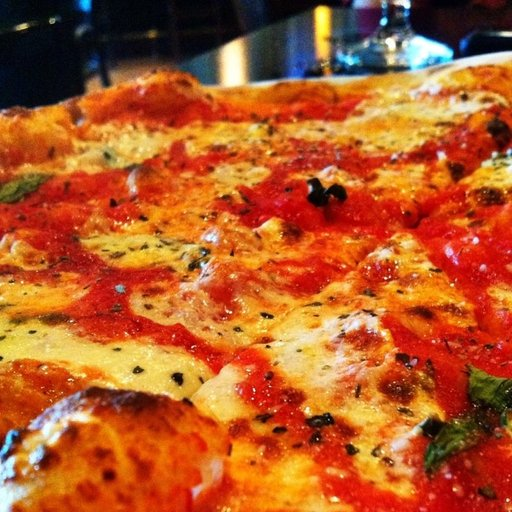

In [31]:
img = Image.open(random_image_path)
print(f"Image path: {random_image_path}")
print(f"Image size: {img.size}")
print(f"Image mode: {img.mode}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
print(f"Image format: {img.format}")
img 

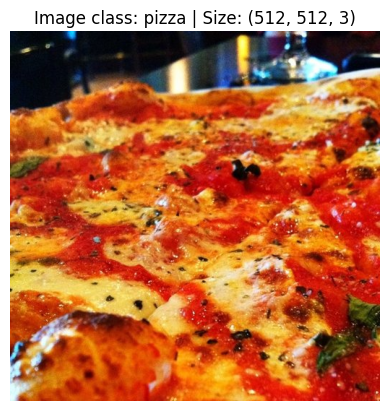

In [35]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.array(img)

plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Size: {img_as_array.shape}")
plt.axis(False);
